<a href="https://colab.research.google.com/github/ecologygas/atcoder/blob/master/%E3%82%B3%E3%83%B3%E3%83%9A%E4%B8%B8%E3%83%91%E3%82%AF%E3%83%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!python -c 'a = set([*vars().keys(), "a"]); from fastai.basics import *; print(*sorted(set(vars().keys())-a), sep="\n")'

/usr/local/lib/python3.6/dist-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
AUROC
AccumulateScheduler
AdamW
AdaptiveConcatPool2d
AffineFunc
AffineMatrix
AnnealFunc
Any
AnyStr
ArgStar
AverageMetric
BCEFlat
BCEWithLogitsFlat
BatchNorm1dFlat
BatchSampler
BatchSamples
BnFreeze
BoolOrTensor
BufferedWriter
ByteTensor
BytesIO
Callable
Callback
CallbackHandler
CallbackList
Category
CategoryList
CategoryProcessor
ClassificationInterpretation
Collection
Config
ConfusionMatrix
Counter
CrossEntropyFlat
DataBunch
DataFrame
DataFrameOrChunks
DataLoader
Dataset
DatasetType
Debugger
DeviceDataLoader
Dict
DistributedDataParallel
DoubleTensor
EmptyLabel
EmptyLabelList
Enum
ExpRMSPE
ExplainedVariance
F
FBeta
FilePathList
Flatten
FlattenedLoss
FloatItem
FloatList
FloatOrTensor
FloatTensor
Floats
GradientClipping
HalfTensor
Hashable
HookFunc
ImgLabel
ImgLab

In [0]:
import numpy as np
import pandas as pd
from subprocess import check_output
import os

from fastai.vision import *
from fastai.metrics import error_rate
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np 
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import os
import glob
from pathlib import Path

In [0]:
from fastai.callbacks import ActivationStats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [0]:
# classes = ['Boletus','Entoloma','Russula','Suillus','Lactarius','Amanita','Agaricus','Hygrocybe','Cortinarius']
# bs = 128
# path = Path('/content/drive/My Drive/c_jikken/Mushrooms')
# dest = path

In [0]:
# classes = ['shirooohara', 'dokutsuru', 'shiromatsu']
# bs = 128
# path = Path('/content/drive/My Drive/c_jikken/docktsuru_data')
# dest = path
# # testpath = Path('')

In [0]:
## 9値分類のためのモデルをロード
classes = ['Boletus','Entoloma','Russula','Suillus','Lactarius','Amanita','Agaricus','Hygrocybe','Cortinarius']
bs = 128
path = Path('/content/drive/My Drive/c_jikken/Mushrooms')
dest = path

dest.mkdir(parents=True, exist_ok=True)
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.35,test='',
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

## 9値分類のロード
learn_9 = cnn_learner(data, models.resnet50, metrics=accuracy)
learn_9.load('/content/drive/My Drive/c_jikken/trained_model4')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:05<00:00, 19.7MB/s]


Learner(data=ImageDataBunch;

Train: LabelList (4365 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Agaricus,Agaricus,Agaricus,Agaricus,Agaricus
Path: /content/drive/My Drive/c_jikken/Mushrooms;

Valid: LabelList (2349 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Russula,Amanita,Cortinarius,Amanita,Amanita
Path: /content/drive/My Drive/c_jikken/Mushrooms;

Test: LabelList (6714 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/c_jikken/Mushrooms, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3

In [0]:
# data.classes
# data.show_batch(rows=3, figsize=(7,8))

In [0]:
# data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ctake', 'kakishimeji', 'muki', 'tukiyo'], 4, 93, 50)

In [0]:
# classes = ['shirooohara', 'dokutsuru', 'shiromatsu']
classes = ['kakishimeji','ctake','tukiyo','muki']
bs = 128
# path = Path('/content/drive/My Drive/c_jikken/docktsuru_data')
path = Path('/content/drive/My Drive/c_jikken/kakishimeji_data')
dest = path
dest.mkdir(parents=True, exist_ok=True)
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.35,test='',
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

## 2値分類のロード
learn_2 = cnn_learner(data, models.resnet50, metrics=accuracy)

In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [0]:
learn_9_top = nn.ModuleList(learn_9.model.children())[-2]
learn_9_under = nn.ModuleList(learn_9.model.children())[-1]

In [0]:
learn_2_top =  nn.ModuleList(learn_2.model.children())[-2]
learn_2_under =  nn.ModuleList(learn_2.model.children())[-1]

In [0]:
learn_2.model = nn.Sequential(nn.ModuleList(learn_9.model.children())[-2],learn_2_under)

In [0]:
# for i,(p_9,p_2) in enumerate(zip(learn_9.model.parameters(),learn_2.model.parameters())):
#   p_2 = copy.deepcopy(p_9)

In [0]:
# ## パラメータのコピー
# for i,(p_9,p_2) in enumerate(zip(learn_9.model.parameters(),learn_2.model.parameters())):
#   # learn_2.model.parameters()
#   break

In [0]:
# new_model =nn.Sequential(nn.ModuleList(learn.model.children())[-2],new_layer)
# new_model = nn.ModuleList(learn.model.children())[-2]

In [0]:
for i,p in enumerate(learn.model.parameters()):
  print(i)

In [0]:
learn_2.load('/content/drive/My Drive/c_jikken/sanchi_bunrui2')

Learner(data=ImageDataBunch;

Train: LabelList (90 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
shirooohara,shirooohara,shirooohara,shirooohara,shirooohara
Path: /content/drive/My Drive/c_jikken/docktsuru_data;

Valid: LabelList (48 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dokutsuru,dokutsuru,shirooohara,shirooohara,shirooohara
Path: /content/drive/My Drive/c_jikken/docktsuru_data;

Test: LabelList (138 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/c_jikken/docktsuru_data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

In [0]:
# new_layer = nn.Sequential(nn.ModuleList(learn.model.children())[-1][:1],
#               nn.Flatten(),
#               nn.BatchNorm1d(4096,eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
#               nn.Dropout(p=0.25),
#               nn.Linear(4096,512),
#               nn.ReLU(inplace=True),
#               nn.BatchNorm1d(512,eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
#               nn.Dropout(p=0.5),
#               nn.Linear(512,2))

In [0]:
# learn.model =nn.Sequential(nn.ModuleList(learn.model.children())[-2],new_layer)

In [0]:
learn_2.model = learn_2.model.to('cuda:0')

In [0]:
# learn.model

In [0]:
learn_2.fit_one_cycle(cyc_len=8, wd=0.9)

epoch,train_loss,valid_loss,accuracy,time
0,2.455777,1.430852,0.440000,00:23
1,2.237676,2.634177,0.380000,00:04
2,1.644766,4.037978,0.420000,00:03
3,1.317156,3.791832,0.480000,00:03
4,1.050265,3.286346,0.540000,00:04
5,0.908293,2.829494,0.580000,00:03
6,0.783786,2.302010,0.640000,00:04
7,0.692466,1.884126,0.680000,00:04


In [0]:
learn_2.save("/content/drive/My Drive/c_jikken/kakishimeji_transfer2")
# learn.export('trained_model.pkl')

In [0]:
learn_2.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


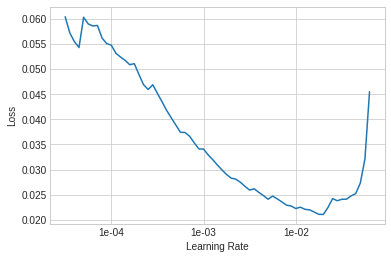

In [0]:
learn_2.lr_find(start_lr = slice(1e-5),end_lr=slice(1))
learn_2.recorder.plot()

In [0]:
learn_2.fit_one_cycle(4, max_lr=slice(1e-3, 1e-2), pct_start=0.8, wd=0.9)

epoch,train_loss,valid_loss,accuracy,time
0,0.072023,1.394222,0.740000,00:04
1,0.055341,0.904457,0.760000,00:04
2,0.071796,0.979910,0.800000,00:03
3,0.087223,1.256541,0.720000,00:04


In [0]:
learn_2.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


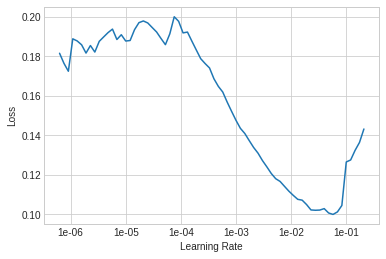

In [0]:
learn_2.lr_find()
learn_2.recorder.plot()

In [0]:
learn_2.fit_one_cycle(4, max_lr=slice(1e-2), pct_start=0.8, wd=0.9)

epoch,train_loss,valid_loss,accuracy,time
0,0.188575,1.105486,0.800000,00:04
1,0.193521,1.095669,0.800000,00:04
2,0.133653,1.116310,0.840000,00:04
3,0.116973,1.064089,0.840000,00:03


In [0]:
interp = ClassificationInterpretation.from_learner(learn_2)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

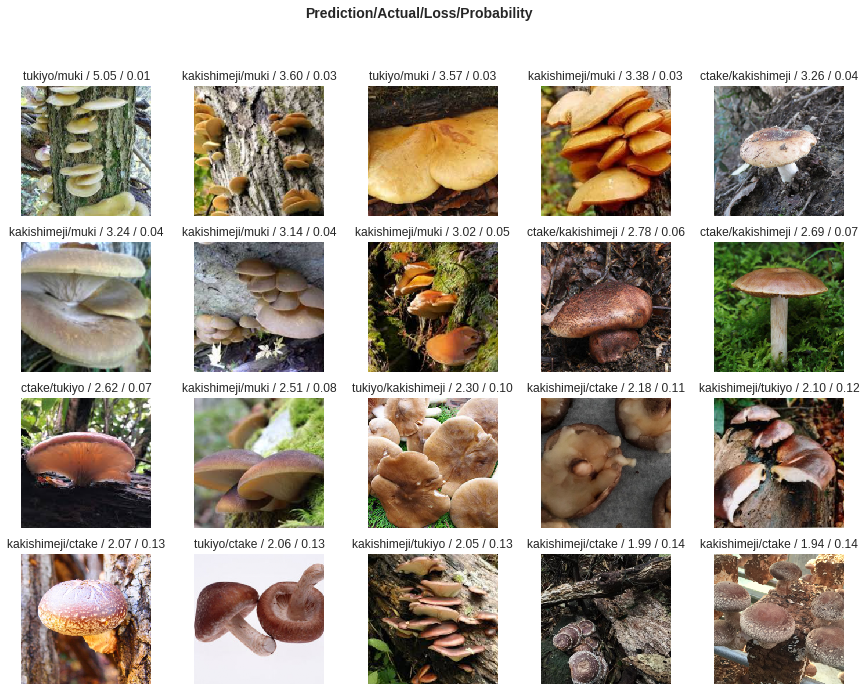

In [0]:
interp.plot_top_losses(20, figsize=(15,11))

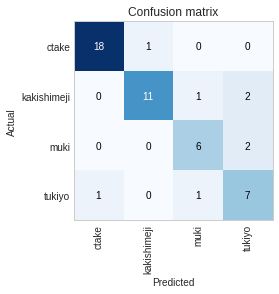

In [0]:
interp.plot_confusion_matrix()

In [0]:
preds_test,y_test, losses_test= learn_9.get_preds(ds_type=data.test_ds, with_loss=True)

OSError: ignored

In [0]:
print("Accuracy on test set: ", accuracy(preds_test,y_test).item())


In [0]:
# dokutsuru = glob.glob("/content/drive/My Drive/c_jikken/ドクツルタケ/*")
# shirooohara = glob.glob("/content/drive/My Drive/c_jikken/シロオオハラタケ/*")


In [0]:
src = '/content/drive/My Drive/c_jikken/IMG_5392.JPG'

In [0]:
juice = open_image(src)
pred_class, pred_idx, outputs = learn_2.predict(juice)
print('pred_class:',pred_class,"outputs:",outputs)

pred_class: ctake outputs: tensor([1.0000e+00, 6.3364e-09, 2.0852e-06, 7.1193e-08])


In [0]:
pred_class, pred_idx, outputs = learn.predict(shirooohara_img)
print(outputs)

In [0]:
agaricus_classified_path = []

In [0]:
# print("---dokutsuru--- ans:Amanita")
# for i in dokutsuru:
#   dokutsuru_img = open_image(i)
#   pred_class, pred_idx, outputs = learn.predict(dokutsuru_img)
#   print(pred_class)

print("---shirooohara--- ans:Agaricus")
for i in shirooohara:
  shirooohara_img = open_image(i)
  pred_class, pred_idx, outputs = learn.predict(shirooohara_img)
  print(pred_class,outputs)

In [0]:
photo_agr = mpimg.imread(agaricus_classified_path[12])
plt.imshow(photo_agr)